# Arboles de regresión cafeteros

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import graphviz

In [172]:
data = pd.read_csv("data_bancarizados_sisben_sica_int.csv",  sep=';', encoding='latin-1')
data.head(5)

bancarizado_fnc_finan  mfa_pers_psocial  cm_pers_psocial  jea_pers_psocial  \
0                      1                 0                0                 0   
1                      1                 0                0                 0   
2                      1                 0                0                 0   
3                      1                 0                0                 0   
4                      0                 0                0                 0   

   edusuperior_pers_psocial puntaje_sisben_3_trunc_psocial  \
0                         0                          57,06   
1                         0                          44,16   
2                         0                          27,12   
3                         0                          44,69   
4                         0                          20,39   

   maestra_grupo_psocial  ing_solidario_per_2psocial  beneficiario  \
0                      4                           0             0   
1                      3                           0             1   
2                      1                           0             1   
3                      3                           0             0   
4                      2                           0             1   

   zona_sisben  ...  tractor_sisben  auto1_sisben  bieraices_sisben  \
0            2  ...               0             0               0.0   
1            3  ...               0             0               0.0   
2            2  ...               0             0               0.0   
3            2  ...               0             0               0.0   
4            1  ...               0             0               0.0   

   carnet_sisben  grado_sisben  puntaje_sisben  edad_cult  densidad  \
0              0             5           57,06          4      5040   
1              4             3           44,16          5      4953   
2              4             6           27,12          9      4810   
3              3             2           44,69          4      5493   
4              0             5           20,39          3      5013   

   tamano_sica  rangos_edad  
0            1            6  
1            2            4  
2            2            4  
3            4            4  
4            2            4  

[5 rows x 43 columns]

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436415 entries, 0 to 436414
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bancarizado_fnc_finan           436415 non-null  int64  
 1   mfa_pers_psocial                436415 non-null  int64  
 2   cm_pers_psocial                 436415 non-null  int64  
 3   jea_pers_psocial                436415 non-null  int64  
 4   edusuperior_pers_psocial        436415 non-null  int64  
 5   puntaje_sisben_3_trunc_psocial  435770 non-null  object 
 6   maestra_grupo_psocial           436415 non-null  int64  
 7   ing_solidario_per_2psocial      436415 non-null  int64  
 8   beneficiario                    436415 non-null  int64  
 9   zona_sisben                     436415 non-null  int64  
 10  vivienda_sisben                 436415 non-null  int64  
 11  pared_sisben                    436415 non-null  int64  
 12  piso_sisben     

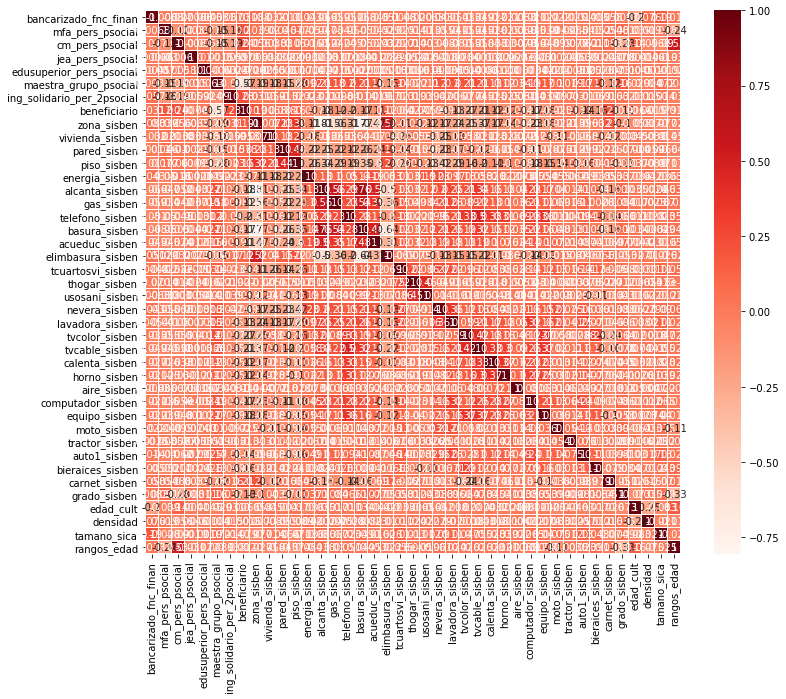

In [174]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor,annot=True, cmap = plt.cm.Reds,linewidths=.1)

In [175]:
data_sample = data.sample(n=20000, random_state=0)
data_sample=data
X = data_sample[data_sample.columns[data_sample.columns != "bancarizado_fnc_finan"]]
X = X[X.columns[X.columns != "puntaje_sisben"]]
X = X[X.columns[X.columns != "puntaje_sisben_3_trunc_psocial"]]
X = X[X.columns[X.columns != "bieraices_sisben"]]


X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436415 entries, 0 to 436414
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   mfa_pers_psocial            436415 non-null  int64
 1   cm_pers_psocial             436415 non-null  int64
 2   jea_pers_psocial            436415 non-null  int64
 3   edusuperior_pers_psocial    436415 non-null  int64
 4   maestra_grupo_psocial       436415 non-null  int64
 5   ing_solidario_per_2psocial  436415 non-null  int64
 6   beneficiario                436415 non-null  int64
 7   zona_sisben                 436415 non-null  int64
 8   vivienda_sisben             436415 non-null  int64
 9   pared_sisben                436415 non-null  int64
 10  piso_sisben                 436415 non-null  int64
 11  energia_sisben              436415 non-null  int64
 12  alcanta_sisben              436415 non-null  int64
 13  gas_sisben                  436415 non-null 

In [176]:
Y = data_sample["bancarizado_fnc_finan"]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: bancarizado_fnc_finan, dtype: int64

In [177]:
#X.corrwith(Y) No se puede por que son string y int. 

In [178]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state = 0, test_size = 0.2)
print("Tamaño de los conjuntos de datos")
print(train_x.shape, test_x.shape)

Tamaño de los conjuntos de datos
(349132, 39) (87283, 39)


## Modelo 1  Predecir si es es bancarizado o no bancarizado (DT johan)

In [179]:
dt = DecisionTreeClassifier(criterion="entropy", random_state = 0,splitter = "best",max_depth=8, )
clf_dt = dt.fit(train_x,train_y)
dot_data = tree.export_graphviz(clf_dt,
                               feature_names = data.columns[:-4],
                               filled=True,
                               rounded = True,
                               special_characters=True,
                               out_file="tree.dot")
pred = dt.predict(test_x)

print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.59      0.13      0.22     19386
           1       0.80      0.97      0.88     67897

    accuracy                           0.79     87283
   macro avg       0.69      0.55      0.55     87283
weighted avg       0.75      0.79      0.73     87283



In [105]:
print("acurracy: ", clf_dt.score(test_x,test_y))

acurracy:  0.787026110468247


In [106]:
cross_val_score(dt,X,Y,cv =5)

array([0.77607323, 0.78940916, 0.78198504, 0.78791976, 0.784391  ])

In [158]:
importances = dt.feature_importances_
index = np.argsort(importances)[::-1]

In [166]:
importances
np.max(importances)
np.argmax(importances)
importances[60]
len(importances)

61

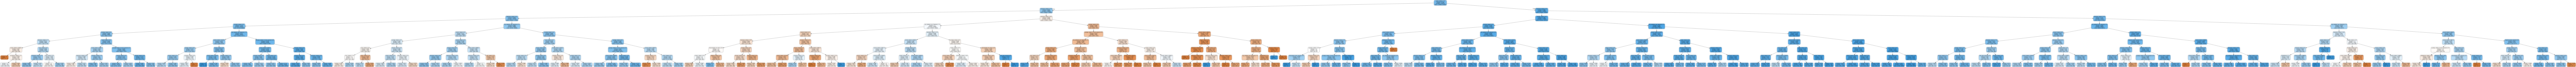

In [184]:
from IPython.display import Image
Image(filename = "tree.png")

In [183]:
%ls

Untitled.ipynb                         data_bancarizados_sisben_sica.xlsx
arboles de regresion cafeteros.ipynb   data_bancarizados_sisben_sica_int.csv
base_maestra_sisben_iv.csv             tree.dot
data_bancarizados_sisben_sica.csv      tree.png


In [182]:
!dot -Tpng tree.dot -o tree.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.721105 to fit


## Modelo 2 : Predecir si es es bancarizado o no bancarizado 

    1) Realizar un CART . 
    2) Evaluar un tardeoff entre Sesgo y Varianza. 
    3) Bagging and Random Forests.
    4) Boosting (AdaBoost and Gradiend Bosting). 
    5) Tunear el modelo


1) CART: Va a buscar aprender una secuencia de preguntas tipo if-else, en realidad, un conjunto de reglas. A diferencia de los modelos lineales, este modelo es capaz de captar relaciones no lineales entre las caracateristicas de los individuos. Ademas no requiereque las caracteristicas esten en una misma escala, no requiere estandarización. 

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

In [36]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state = 0, test_size = 0.2)
print("Tamaño de los conjuntos de datos")
print(train_x.shape, test_x.shape)

dt = DecisionTreeClassifier(criterion="gini", random_state = 0,splitter = "best",max_depth=50, )
#criterion: Disponibles “gini”, “entropy”
 
clf_dt = dt.fit(train_x,train_y)

pred_y = dt.predict(test_x)

acc=accuracy_score(test_y,pred_y)
print("Test set accuracy: {:.2f}".format(acc))

print(classification_report(test_y,pred_y))

Tamaño de los conjuntos de datos
(349132, 39) (87283, 39)
Test set accuracy: 0.69
              precision    recall  f1-score   support

           0       0.31      0.34      0.33     19386
           1       0.81      0.78      0.79     67897

    accuracy                           0.69     87283
   macro avg       0.56      0.56      0.56     87283
weighted avg       0.70      0.69      0.69     87283



Al quererse comprarar con la regresión logistica entonces: 

In [35]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg=logreg.fit(train_x, train_y)
pred_y_log=logreg.predict(test_x)

acc=accuracy_score(test_y,pred_y_log)
print("Test set accuracy: {:.2f}".format(acc))

print(classification_report(test_y,pred_y_log))

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
#from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(X=test_x Y=test_y, clfs) # No todo se puede graficar y dibujar.


Test set accuracy: 0.78
              precision    recall  f1-score   support

           0       0.61      0.08      0.15     19386
           1       0.79      0.98      0.88     67897

    accuracy                           0.78     87283
   macro avg       0.70      0.53      0.51     87283
weighted avg       0.75      0.78      0.72     87283



Si quiere ponerse una condición de detención: 

In [55]:
dt = DecisionTreeClassifier(criterion="gini", 
                            random_state = 0,
                            splitter = "best",
                            max_depth=50, 
                            min_samples_leaf=0.2 #Criterio de detención:Cada hoja debe tener almmeso 10% de los datos de entrenamiento
                           )
#criterion: Disponibles “gini”, “entropy”
 
clf_dt = dt.fit(train_x,train_y)
pred_y = dt.predict(test_x)
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19386
           1       0.78      1.00      0.88     67897

    accuracy                           0.78     87283
   macro avg       0.39      0.50      0.44     87283
weighted avg       0.61      0.78      0.68     87283



/Users/usuariomac/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2) Evaluar la compensación entre el sesgo y la varianza, al momento de realizar la estimación no se quiere que el arbol quede ni sobreajustado ni sin ajustar. El error de generalización de un modelo le indica cuanto generaliza los datos no vistos. 

El error de generaciación se puede definir como : $F=bias^2+variance+error irreductible$

Lo importante es siempre encontrar el error de generalización en el menor posible, tenga en cuenta que a medida que la complejidad del modelo disminuye, la varianza disminuye y el sesgo aumenta. Se necesita un equilibrio entre el sesgo y varianza. 

Primero debe encontrar el error de generalización, para obtener una estimación fiable de del error del modelo es optimo que se utilice la validación cruzada, existen muchos algoritmos de validación cruzada (K-flod o hold-out).Con la validacion cruzada se obtienen los errores. 

Luego de que se estima este error de generalización, se compara con el error de entrenamiento. 

1) Si es mayor quiere decir que existe una alta varianza, existe problemas de sobreajuste, debe reducir la complejidad del modelo (minimizando depth, incrementando el numero max de muestras por hoja leaf, entre otros)

2) Si es igual al error de entrenamiento, pero mucho mayor al error deseado, se dice que es un modelo underfit. Debe incrementar el numero de nodos, disminuir el numero de muestras por hojas leaf, agregar más caracteristicas. 


Se calcula el error de generalización por medio de un algorito de validación crusada con cv=10, número de particiones. 

In [151]:
# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeClassifier(criterion="entropy", random_state = 0,splitter = "best",max_depth=50, )
#criterion: Disponibles “gini”, “entropy”
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, train_x,train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) # Indica el gasto en gpu. 
# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.56


Se calcula el error de entrenamiento:

In [113]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(train_x,train_y)

# Predict the labels of the training set
y_pred_train = dt.predict(train_x)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(train_y, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.02


En este paso se debe evaluar el RMSE de cross validation con el de entrenamiento. 

3) Aprendizaje en conjunto: 

En general los algoritmos de CARTs son faciles de entender e interpretar, faciles de usar tambien y tienen una alta flexibilidad para describrir las dependencias no lineales. Sin embargo tiene el problema de que las bandas de confianza necesitan de la propiedad de la ortognolidad, sencible a pequeñas variaciones en el conjunto de entrenamiento. En general son modelo de alta varianza, una manera de solucionar esto es por medio de "ensemble learning" , aprendizjae en conjunto. 

El aprendizaje en conjunto consiste en que se deben entrenar diferentes modelos con la misma data, cada modelo hace su predicción o clasificación, y un metamodelo agrega todas las predicciones y resulta una predicción final. Esta prediccion final es mas robustas y menos propensa a errores de cada modelo individual.  

In [152]:
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED=1
# Instantiate lr
lr = LogisticRegression(random_state=SEED)
# Instantiate knn
knn = KNN(n_neighbors=27)
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)
# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [140]:
#Correr la linea antes del modelo 1: 
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state = 0, test_size = 0.2)
print("Tamaño de los conjuntos de datos")
print(train_x.shape, test_x.shape)


for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Tamaño de los conjuntos de datos
(349132, 39) (87283, 39)
Logistic Regression : 0.785
K Nearest Neighbours : 0.784
Classification Tree : 0.778


Uno de los algoritmos usados para aprendizaje en conjunto es el "votingclassifier

In [153]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.785


## Modelo 3: 

Clasificar el grupo del sisben IV de los productores cafeteros utilizando base de sisben IV.  

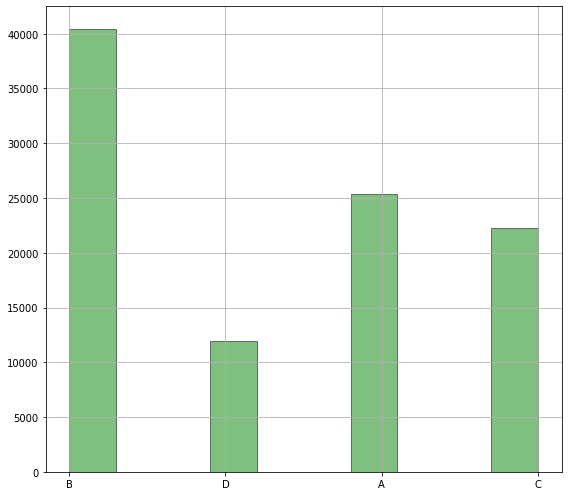

In [154]:
data = pd.read_csv("base_maestra_sisben_iv.csv")
df = pd.DataFrame(data = data)
df.head(5)
df.select_dtypes(include=["int","object"]).columns
df_sample = df.sample(n=100000, random_state=0)

X = df_sample.drop("sisben_iv", axis=1)
y = df_sample["sisben_iv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y.hist(figsize = (8,7), ec = "k",alpha= 0.5,color = "green")
plt.tight_layout()

In [155]:
dt = DecisionTreeClassifier(criterion="gini", random_state = 0,splitter = "best",max_depth=50, )
#criterion: Disponibles “gini”, “entropy”
 
clf_dt = dt.fit(X_train,y_train)

pred_y = dt.predict(X_test)

print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           A       0.49      0.48      0.49      5066
           B       0.49      0.49      0.49      8105
           C       0.31      0.32      0.32      4492
           D       0.40      0.39      0.39      2337

    accuracy                           0.44     20000
   macro avg       0.42      0.42      0.42     20000
weighted avg       0.44      0.44      0.44     20000



# Modelo 4

Usar una regresión con el algoritmo de arboles para estimar el area de café según su caracterización socioeconómico: 

Tenga en cuenta que en esta regresión el criterio de impureza será una medida de evaluación de prónostico (Error cuadratico medio) , esto tambien significa que el arbol de regresión intenta encontrar las divisiones que producen hojas, donde en cada hoja los valores objetivos son en promedio, lo mas cercano posible al valor medio de las eq

In [89]:
data = pd.read_csv("base_maestra_sisben_iv.csv")
df = pd.DataFrame(data = data)
df.head(5)
df.select_dtypes(include=["int","object"]).columns
df_sample = df.sample(n=20000, random_state=0)


# Se puede traer el lenguaje sql para hacer esta clase de arreglos: https://towardsdatascience.com/sql-in-python-for-beginners-b9a4f9293ecf 

X = df_sample.drop(["area_cafe_SICA", "sisben_iv"], axis=1) #axis=1
y = df_sample["area_cafe_SICA"]

95665     0.95
91957     0.40
68246     0.26
291656    0.51
57806     2.69
          ... 
198246    0.60
276678    1.73
106506    1.09
135869    1.41
232012    0.77
Name: area_cafe_SICA, Length: 20000, dtype: float64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#y.hist(figsize = (8,7), ec = "k",alpha= 0.5,color = "green")
#plt.tight_layout()

In [104]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)
# Fit dt to the training set
dt.fit(X_train, y_train)
# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))


Test set RMSE of dt: 1.63


In [96]:
# Predict test set labels 
from sklearn.linear_model import LinearRegression as lr
lr=lr()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 1.58
Regression Tree test set RMSE: 1.63
